Anomaly Analysis Report:
- Region 0 is located at (48, 48), size 128×128 px, area ≈ 16048.5 px.


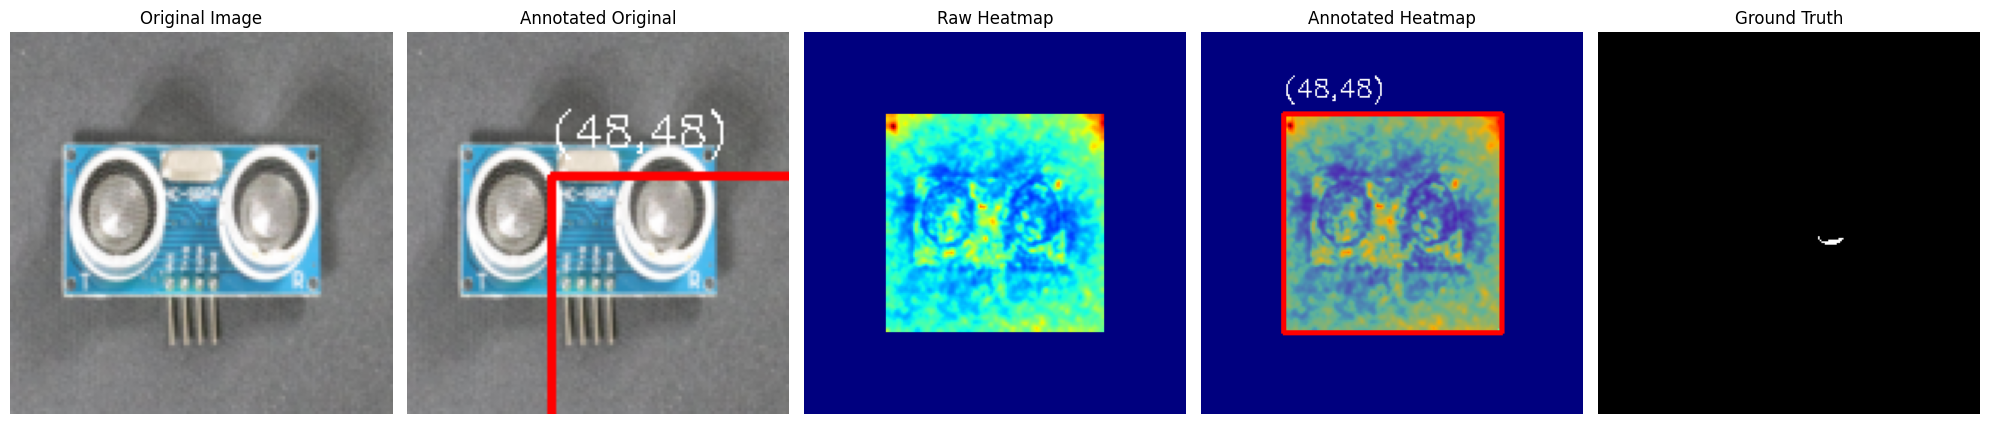

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_anomalies(heatmap_path: str, orig_path: str, gt_path: str, min_area: float = 50.0):
    """
    Perform thresholding and contour detection on an anomaly heatmap,
    overlay detected regions on both the heatmap and the original image,
    annotate with coordinates, and print an English descriptive report.
    Finally, display five images: original clear, annotated clear,
    raw heatmap, annotated heatmap, and ground truth.
    
    Args:
        heatmap_path: Path to the colored heatmap image.
        orig_path: Path to the original RGB image.
        gt_path: Path to the ground truth mask/image.
        min_area: Ignore contours smaller than this area (in pixels).
    """
    # Load images
    heatmap_color = cv2.imread(heatmap_path, cv2.IMREAD_COLOR)
    orig = cv2.imread(orig_path, cv2.IMREAD_COLOR)
    gt = cv2.imread(gt_path, cv2.IMREAD_COLOR if gt_path.lower().endswith(('.png','.jpg','.jpeg')) else cv2.IMREAD_GRAYSCALE)
    if heatmap_color is None or orig is None or gt is None:
        raise FileNotFoundError("One or more image paths are invalid. Please check heatmap, original, and GT paths.")
    
    # Prepare copies
    heatmap_vis = heatmap_color.copy()
    orig_vis = orig.copy()
    
    # Process heatmap for contours
    heatmap_gray = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(heatmap_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    
    contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    report = []
    
    # Annotate both images
    for idx, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        if area < min_area:
            continue
        x, y, w, h = cv2.boundingRect(cnt)
        report.append((idx, x, y, w, h, area))
        
        # Draw boxes
        cv2.rectangle(orig_vis, (x,y), (x+w,y+h), (0,0,255), 2)
        cv2.rectangle(heatmap_vis, (x,y), (x+w,y+h), (0,0,255), 2)
        
        # Overlay
        overlay = heatmap_vis.copy()
        cv2.drawContours(overlay, [cnt], -1, (0,0,255), -1)
        cv2.addWeighted(overlay, 0.3, heatmap_vis, 0.7, 0, heatmap_vis)
        
        # Coordinates text
        coord_text = f"({x},{y})"
        cv2.putText(orig_vis, coord_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)
        cv2.putText(heatmap_vis, coord_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)
    
    # Print report
    print("Anomaly Analysis Report:")
    if not report:
        print("No anomaly regions detected above the minimum area threshold.")
    else:
        for idx, x, y, w, h, area in report:
            print(f"- Region {idx} is located at ({x}, {y}), size {w}×{h} px, area ≈ {area:.1f} px.")
    
    # Display 1×5 grid
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    # Original clear
    axes[0].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    # Annotated clear
    axes[1].imshow(cv2.cvtColor(orig_vis, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Annotated Original")
    axes[1].axis('off')
    # Raw heatmap
    axes[2].imshow(cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB))
    axes[2].set_title("Raw Heatmap")
    axes[2].axis('off')
    # Annotated heatmap
    axes[3].imshow(cv2.cvtColor(heatmap_vis, cv2.COLOR_BGR2RGB))
    axes[3].set_title("Annotated Heatmap")
    axes[3].axis('off')
    # Ground truth
    if len(gt.shape) == 2 or gt.shape[2] == 1:
        axes[4].imshow(gt, cmap='gray')
    else:
        axes[4].imshow(cv2.cvtColor(gt, cv2.COLOR_BGR2RGB))
    axes[4].set_title("Ground Truth")
    axes[4].axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    heatmap_path = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\results\pcb1_sample77_hm.png"
    orig_path    = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\results\pcb1_sample77_clear.png"
    gt_path      = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\results\pcb1_sample77_gt.png"
    analyze_anomalies(heatmap_path, orig_path, gt_path)


In [12]:
# ───────────────────────────────────────────────────────────
# 1. 安裝並匯入套件（只要執行一次）
!pip install openai==0.28

import os
import openai
from IPython.display import display, Image


  Attempting uninstall: openai
    Found existing installation: openai 1.98.0
    Uninstalling openai-1.98.0:
      Successfully uninstalled openai-1.98.0


In [13]:
# ───────────────────────────────────────────────────────────
# 2. 設定 API Key
#    建議把 key 存在環境變數 OPENAI_API_KEY，再這裡讀取：
openai.api_key = os.getenv("OPENAI_API_KEY")
# 若你要直接寫在程式裡，也可以：
# openai.api_key = "你的_api_key_here"


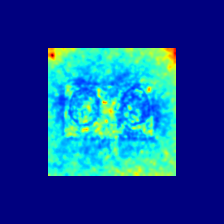

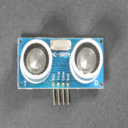

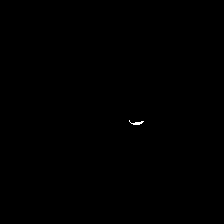

In [10]:
# ───────────────────────────────────────────────────────────
# 3. 載入並顯示三張圖（確認路徑無誤）
heatmap_path = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\results\pcb1_sample77_hm.png"
orig_path    = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\results\pcb1_sample77_clear.png"
gt_path      = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\results\pcb1_sample77_gt.png"

display(Image(filename=heatmap_path))
display(Image(filename=orig_path))
display(Image(filename=gt_path))


In [14]:
# ───────────────────────────────────────────────────────────
# 4. 呼叫 GPT-4 Vision API 進行異常分析
with open(heatmap_path, "rb") as f_hm, \
     open(orig_path,    "rb") as f_orig, \
     open(gt_path,      "rb") as f_gt:

    resp = openai.ChatCompletion.create(
        model="gpt-4o-mini",   # 或其他支援 vision 的 GPT-4 變體
        messages=[
            {
                "role": "user",
                "content": (
                    "請根據這三張圖：\n"
                    "1. heatmap（模型異常分數分佈）\n"
                    "2. 原始影像\n"
                    "3. Ground Truth 異常遮罩\n"
                    "撰寫一份詳細的「異常分析報告」，\n"
                    "具體指出圖中異常區域、異常原因，並說明依據。"
                )
            }
        ],
        files=[
            {"file": f_hm,   "purpose": "analysis"},
            {"file": f_orig, "purpose": "analysis"},
            {"file": f_gt,   "purpose": "analysis"},
        ]
    )

# 印出模型回覆
analysis_text = resp.choices[0].message.content
print(analysis_text)


APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

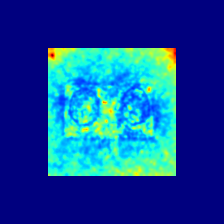

Heatmap


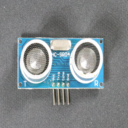

Original


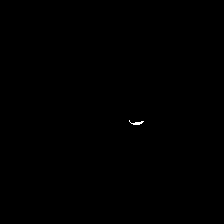

Ground Truth Mask
--- Heatmap Caption ---
if you have any questions, please contact us

--- Original Caption ---
if there are any visible defects, please describe them

--- GT Mask Caption ---
the ground truth mask is a mask that represents the ground truth of the data



In [17]:
# ─────────────────────────────────────────────────────────────────────────────
# Cell 1: 安裝並匯入所需套件
!pip install transformers accelerate torch torchvision --quiet

import torch
from PIL import Image
from IPython.display import display
from transformers import Blip2Processor, Blip2ForConditionalGeneration
# ─────────────────────────────────────────────────────────────────────────────

# Cell 2: 載入 BLIP-2 模型與 Processor
device = "cuda" if torch.cuda.is_available() else "cpu"
processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model     = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl").to(device)
# ─────────────────────────────────────────────────────────────────────────────

# Cell 3: 定義並顯示三張圖
heatmap_path = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\results\pcb1_sample77_hm.png"
orig_path    = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\results\pcb1_sample77_clear.png"
gt_path      = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\results\pcb1_sample77_gt.png"

img_hm   = Image.open(heatmap_path).convert("RGB")
img_orig = Image.open(orig_path).convert("RGB")
img_gt   = Image.open(gt_path).convert("RGB")

display(img_hm);   print("Heatmap") 
display(img_orig); print("Original") 
display(img_gt);   print("Ground Truth Mask")
# ─────────────────────────────────────────────────────────────────────────────

# Cell 4: 定義 caption 函式
def generate_caption(image: Image.Image, prompt: str = "Describe this image:") -> str:
    inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)
    out    = model.generate(**inputs, max_new_tokens=64)
    return processor.decode(out[0], skip_special_tokens=True)

# Cell 5: 分別對三張圖做 captioning
captions = {}
captions["Heatmap"] = generate_caption(img_hm,   prompt="Please describe the anomaly heatmap and highlight any unusual regions.")
captions["Original"] = generate_caption(img_orig, prompt="Please describe the PCB board and note any visible defects.")
captions["GT Mask"] = generate_caption(img_gt,    prompt="Please describe the ground truth mask and what it indicates.")

# Cell 6: 印出所有結果
for tag, text in captions.items():
    print(f"--- {tag} Caption ---\n{text}\n")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

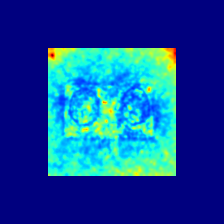

Heatmap


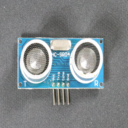

Original PCB Image


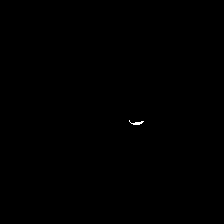

Ground Truth Mask


In [ ]:
# ─────────────────────────────────────────────────────────────────────────────
# Cell 1: 安装并导入必要套件
!pip install transformers accelerate torch torchvision --quiet

import torch
from PIL import Image
from IPython.display import display
from transformers import Blip2Processor, Blip2ForConditionalGeneration
# ─────────────────────────────────────────────────────────────────────────────

# Cell 2: 加载 BLIP-2 模型与 Processor
device   = "cuda" if torch.cuda.is_available() else "cpu"
processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model     = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl").to(device)
# ─────────────────────────────────────────────────────────────────────────────

# Cell 3: 定义并显示三张图
heatmap_path = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\results\pcb1_sample77_hm.png"
orig_path    = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\results\pcb1_sample77_clear.png"
gt_path      = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\results\pcb1_sample77_gt.png"

img_hm   = Image.open(heatmap_path).convert("RGB")
img_orig = Image.open(orig_path).convert("RGB")
img_gt   = Image.open(gt_path).convert("RGB")

display(img_hm);   print("Heatmap") 
display(img_orig); print("Original PCB Image") 
display(img_gt);   print("Ground Truth Mask")
# ─────────────────────────────────────────────────────────────────────────────

# Cell 4: 定义调用函数
def analyze_anomaly(image: Image.Image, prompt: str) -> str:
    """
    用 BLIP-2 对单张图做异常分析式描述
    prompt 中需清楚指出“要找出异常区域并说明原因”
    """
    inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)
    outputs = model.generate(**inputs, max_new_tokens=128)
    return processor.decode(outputs[0], skip_special_tokens=True)

# ─────────────────────────────────────────────────────────────────────────────
# Cell 5: 分别对三张图进行“异常分析”式调用
captions = {}

captions["Heatmap Analysis"] = analyze_anomaly(
    img_hm,
    prompt=(
        "这是模型生成的异常热力图（anomaly heatmap），"
        "请找出图中得分最高的异常区域，"
        "并用自然语言描述这些区域的位置和可能的异常类型。"
    )
)

captions["Original PCB Analysis"] = analyze_anomaly(
    img_orig,
    prompt=(
        "这是 PCB 板的原始照片，"
        "请根据热力图推测可能的缺陷位置，"
        "指出哪些地方看起来有异常，并说明你的判断依据。"
    )
)

captions["GT Mask Analysis"] = analyze_anomaly(
    img_gt,
    prompt=(
        "这是 Ground Truth 异常遮罩，"
        "请解释遮罩中标记的区域代表什么异常，"
        "并简要对比热力图和原始图像的差异。"
    )
)

# ─────────────────────────────────────────────────────────────────────────────
# Cell 6: 打印所有“异常分析”结果
for title, text in captions.items():
    print(f"\n=== {title} ===\n{text}\n")
